# Neural Collaborative Filtering 논문 리뷰



## 1. 서론

본 논문은 추천시스템 분야에서 유명한 Matrix Factorization(MF)의 한계점을 지적하고 이러한 문제점을 보완한 Neural Collaborative Filtering(NCF)에 대해 소개하고자 한다.

추천시스템은 수 많은 정보의 부담을 완화하는 데에 중요한 역할을 한다. 협업 필터링으로 알려진 추천시스템 알고리즘은 사용자의 클릭 수나 평점 등의 과거 데이터를 바탕으로 개인화된 추천시스템을 구축한다. 그 중 가장 유명한 MF는 내적을 통해 사용자와 상품의 잠재된 특성을 구한다. 그동안 다양한 모델들과 결합하는 등 MF의 성능을 향상시키기 위한 많은 노력들이 있었지만 내적이라는 단순한 상호작용 함수로 인해 MF 성능에 항상 제약이 존재했다. 내적은 잠재된 특성을 단순히 선형적으로 곱해주기 때문에 사용자가 상품을 선택하고 평점을 주는 복잡한 구조를 충분히 설명할 수 없다. 따라서, 저자는 Deep Neural Network를 사용하여 기존의 MF가 가진 한계점들을 극복하고자 한다. 또한, 명시적 피드백과 달리 자동적으로 추적되어 수집이 용이한 암묵적 피드백을 분석함에 있어 DNN이 어떻게 잡음이 많은 암묵적 피드백 속에서도 신호를 잡을 수 있는지에 대해 탐구하고자 한다.

## 2. 암묵적 피드백에 대한 기존 협업 필터링 방식의 한계점

- 2-1) 암묵적 피드백에 대한 탐구  

암묵적 데이터를 분석함에 있어 난점은 암묵적 피드백에 대한 함수값이 1 또는 0이 되더라도 사용자가 상품을 선호 혹은 비선호한다고 단정지을 수 없다는 점이다. 사용자가 명시적으로 상품에 대한 후기를 남긴 것이 아니기 때문이다. 또한 상품에 대해 사용자의 활동이 관측된 경우, 적어도 사용자의 관심을 나타낸다고 볼 수 있으나 관측되지 않을 경우, 이는 결측값이 되어 부정적인 피드백은 더욱 희소해진다는 분석의 어려움이 있다. 

- 2-2) 목적함수의 종류  

\begin{align*} \
L_{1} &= min \ \dfrac{1}{2}(\hat{y}_{u,i} - y_{u,i})^{2} \\
L_{2} &= max(0, f(y_{unobs})-f(y_{obs})+\alpha)  \ \ s.t  \ \  rank(y_{obs}) >rank(y_{unobs})
\end{align*} \\
pointwise loss의 경우, 실제값과 예측값의 차이를 최소화하는 함수이며, pairwise loss는 관측값의 순위가 관측되지 않은 값의 순위보다 높게 되도록 그 차이를 최대화하는 것이 핵심인 함수이다. 저자는 NCF가 interaction function으로 DNN을 사용하기 때문에 자연스럽게 L1과 L2의 학습을 모두 진행할 수 있다고 한다.

- 2-3) MF의 한계점

앞서 언급한 바와 같이 저자는 내적과 같은 선형적 모델로 사용자와 아이템 간의 복잡한 상호작용을 표현할 수 없다고 한다. 
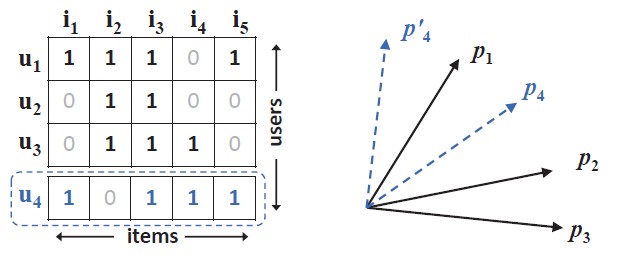

위와 같은 상황에서 사용자 4가 등장할 경우, 벡터 공간에서 사용자 4를 사용자 1과 가장 가깝게 하는 동시에 사용자 2와 가장 멀게 할 수 있는 방법이 없다는 문제점이 발생한다. 행렬 분해로 인해 낮아진 차원에서 사용자와 상품간의 복잡한 관계를 표현할 수 없기 때문이다. 
\begin{align*}
s_{41}(0.60) > s_{43}(0.40) > s_{42}(0.20) 
\end{align*}
이를 해결하기 위해 잠재 요인 k의 크기를 늘릴 수 있지만 이러한 해결방법은 희소행렬에서 모델이 학습 데이터에 과적합될 위험성이 더욱 커지기 때문에 지양해야 한다. 따라서 저자는 interaction function으로 DNN을 사용함으로써 위와 같은 제약을 해결하고자 한다.

## 3. NCF
- 3-1) General Framework  
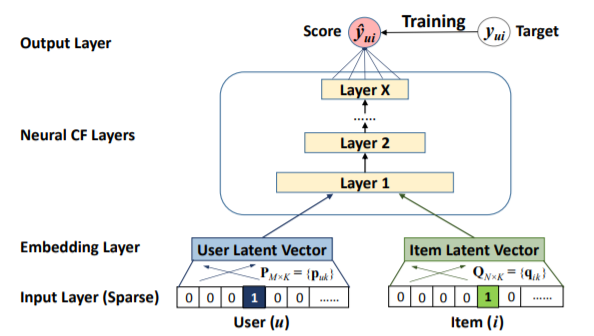

input layer로 사용자와 상품의 원-핫인코딩 벡터가 사용되며 희소한 input vector를 embedding layer에 투영함으로써 dense 벡터로 변환된다. 이후, Neural collaborative filtering layer에서 user latent vector 와 item latent vector를 결합한 벡터를 input으로 받게 되어 여러 층을 거치며 학습을 진행하게 된다. \begin{align*} f(P^{T}v_{u}^{U}, Q^{T}v_{i}^{I}|P,Q,\Theta_{f}) = \phi_{out}(\phi_{X}(…\phi_{2}(\phi_{1}(P^{T}v_{u}^{U}, Q^{T}v_{i}^{I}))…)) \end{align*} \
이와 같은 모델의 학습을 위해 손실함수를 구해야 하는데 이는 likelihood function에 negative logarithm을 취한 함수로 아래 수식과 같다. 손실 함수의 최적화는 SGD방식으로 진행된다.
\begin{align*}
L &= -log \ p(\mathcal{Y}, \mathcal{Y}^{-} | P,Q,\Theta_{f}) \\
\\
&= -\sum_{(u,i) \in \mathcal{Y}} y_{u,i}\ log \ \hat{y}_{u,i} - (\sum_{(u,j) \ in  \mathcal{Y}^{-}} (1- y_{u,i}) \ log \ (1-\hat{y}_{u,j}) ) \\
&= -(\sum_{(u,i) \in  \mathcal{Y} \cup \mathcal{Y}^{-} } ( y_{u,i}\ log \ \hat{y}_{u,i} + (1- y_{u,i}) \ log \ (1-\hat{y}_{u,i})))
\end{align*}

- 3-2) General Matrix Factorization (GMF)  

MF는 앞서 설명한 NCF 프레임워크 안에서 특수한 케이스로 설명 가능하다. $\hat{y}_{u,i}$를 아래와 같이 변환하면 MF가 된다.
\begin{align*}
\hat{y}_{u,i} &= a_{out}(h^{T}\phi_{1}(P^{T}v_{u}^{U}, Q^{T}v_{i}^{I})) \\ 
where \ \ a_{out} &= \text{identity function} \\
h^{T}&=[1,...,1]_{\text{1 x k}} \\
\phi_{1} &= P^{T}v_{u}^{U} \odot Q^{T}v_{i}^{I}  \\
\end{align*}

- 3-3) Multi-Layer Perceptron

사용자와 상품, 두 요인 사이의 상호작용을 설명하기 위해 은닉층의 구성은 필수적이다. MLP의 활성화 함수로 시그모이드 함수, 하이퍼볼릭 탄젠트 함수, Relu 등의 함수가 있으며 그 중 Relu 함수가 희소 데이터에 알맞고 과적합의 위험성을 덜어주기에 연이어 설명할 NeuMF를 구성하는 MLP 활성화 함수로는 Relu를 사용한다.

- 3-4) Fusion of MLP & GMF

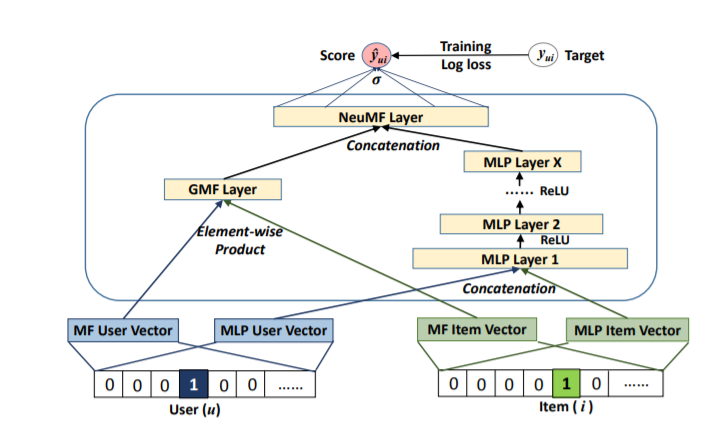

그림에서 확인할 수 있듯이 GMF와 MLP는 임베딩을 공유하지 않음으로써 성능의 제약을 최소화한다. 모델의 유연성을 더하기 위해 GMF와 MLP가 서로 분리된 임베딩을 학습하도록 하고, 마지막 은닉층에서 두 모델을 결합한다.

## 4. 실험 결과
실제 데이터셋에 기반한 실험을 통해 NCF 성능이 우수한지, 추천 알고리즘에 NCF 프레임워크가 알맞은지에 관해 확인할 수 있다. ItemPop, ItemKNN, BPR, eALS 모델을 비교 모델로 설정하여 실험을 계획했으며, 결과적으로 비교 모델보다 MLP, GMF, NeuMF 모델이 모두 우수했다. 또한, 각 모델은 NeuMF > MLP > GMF 순으로 성능이 좋았다. 추가적으로 선행 학습(Pre-Training)의 유무에 따른 성능 비교도 진행되었고, 선행 학습을 통해 Weight와 Bias를 잘 초기화해주는 것이 모델의 성능에 긍정적인 영향을 끼친다는 것을 확인할 수 있었다.

## 이미지 및 수식을 참고한 깃허브

https://leehyejin91.github.io/post-ncf/